In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [3]:
# Creating DataFrame df from CSV StandDF
corr_df = pd.read_csv('ReadyDF1', index_col=0)


# Displaying first five results 
corr_df.head()

,Y1,Y2,C1,C2,C4,C7,C3',C5',C6',T4',T3',T5',S1',S2',S3'
0,0,1,2.086360,1.0,0.029074,1.710498,1,1.351792,1.306758,0.640426,0.979660,-1.241958,0.172661,-2.012621,-1.937792
1,1,0,2.413300,0.0,-0.013352,1.413903,0,2.487306,0.000000,0.644753,1.275142,-1.031589,0.180641,-1.696991,-1.706058
2,1,0,1.954243,1.0,0.020715,0.867939,0,1.214656,0.000000,0.636816,0.630286,-1.568923,0.171728,-2.562293,-2.302656
3,1,1,2.320146,1.0,0.020023,0.930745,0,1.193831,0.000000,0.539634,0.792975,-1.374089,0.187973,-2.309955,-2.039414
4,0,1,1.903090,1.0,-0.034895,2.800922,1,1.315407,1.195813,0.587413,1.045896,-1.223474,0.177183,-1.907621,-1.858090


In [4]:
#Calculate correlation with .corr(): 
print(corr_df.corr(method = 'spearman'))

           Y1        Y2        C1        C2        C4        C7       C3'  \
Y1   1.000000 -0.227029  0.044575 -0.062170 -0.069439 -0.037370 -0.083833   
Y2  -0.227029  1.000000 -0.013713  0.069761  0.104132 -0.054621  0.018811   
C1   0.044575 -0.013713  1.000000  0.005340  0.107441  0.062303  0.024549   
C2  -0.062170  0.069761  0.005340  1.000000 -0.029440  0.210420  0.010506   
C4  -0.069439  0.104132  0.107441 -0.029440  1.000000  0.012649 -0.028246   
C7  -0.037370 -0.054621  0.062303  0.210420  0.012649  1.000000  0.341722   
C3' -0.083833  0.018811  0.024549  0.010506 -0.028246  0.341722  1.000000   
C5' -0.053598  0.053887 -0.004415  0.146025 -0.058804 -0.051100 -0.028962   
C6' -0.765512  0.232780 -0.049938  0.114356  0.087988 -0.005557  0.098919   
T4'  0.071374 -0.013645  0.056634  0.042819  0.092600  0.133916  0.059438   
T3'  0.025249 -0.053202  0.120322  0.206314  0.029271  0.337979  0.085222   
T5'  0.048010 -0.051930  0.135923  0.218371  0.044708  0.291312  0.032125   

In [5]:
# Create the matrix of correlation score between the features and the label
corr_df.corr(method='spearman').style.format("{:.1}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Y1,Y2,C1,C2,C4,C7,C3',C5',C6',T4',T3',T5',S1',S2',S3'
Y1,1e+00,-0.2,0.04,-0.06,-0.07,-0.04,-0.08,-0.05,-0.8,0.07,0.03,0.05,0.09,0.1,0.06
Y2,-0.2,1e+00,-0.01,0.07,0.1,-0.05,0.02,0.05,0.2,-0.01,-0.05,-0.05,-0.06,-0.09,-0.03
C1,0.04,-0.01,1e+00,0.005,0.1,0.06,0.02,-0.004,-0.05,0.06,0.1,0.1,0.1,0.1,0.1
C2,-0.06,0.07,0.005,1e+00,-0.03,0.2,0.01,0.1,0.1,0.04,0.2,0.2,0.2,0.2,0.2
C4,-0.07,0.1,0.1,-0.03,1e+00,0.01,-0.03,-0.06,0.09,0.09,0.03,0.04,0.04,0.03,0.05
C7,-0.04,-0.05,0.06,0.2,0.01,1e+00,0.3,-0.05,-0.006,0.1,0.3,0.3,0.3,0.3,0.3
C3',-0.08,0.02,0.02,0.01,-0.03,0.3,1e+00,-0.03,0.1,0.06,0.09,0.03,0.1,0.05,0.05
C5',-0.05,0.05,-0.004,0.1,-0.06,-0.05,-0.03,1e+00,0.1,0.1,0.2,0.2,0.1,0.07,0.2
C6',-0.8,0.2,-0.05,0.1,0.09,-0.006,0.1,0.1,1e+00,-0.02,0.05,0.01,-0.01,-0.02,0.02
T4',0.07,-0.01,0.06,0.04,0.09,0.1,0.06,0.1,-0.02,1e+00,0.4,0.4,0.4,0.3,0.4


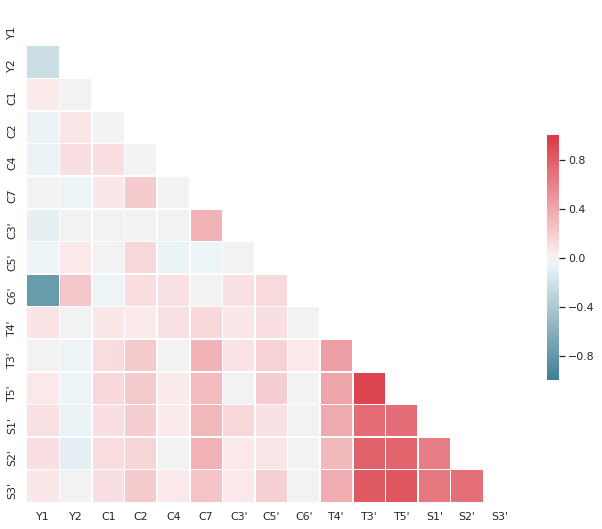

In [6]:

# Another correlation matrix
corr = corr_df.corr(method = 'spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.set(style="white")

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Set up the matplotlib figure
ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax= 1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [7]:
# check if features are highly correlated with Target Variables using New_Df
##Y2 (>.5 or <-.5)

s1 = corr_df.corr()['Y1'] > 0.5 
s2 = corr_df.corr()['Y1'] < -0.5
s1 | s2 # logical OR

Y1      True
Y2     False
C1     False
C2     False
C4     False
C7     False
C3'    False
C5'    False
C6'     True
T4'    False
T3'    False
T5'    False
S1'    False
S2'    False
S3'    False
Name: Y1, dtype: bool

In [8]:
# check if features are highly correlated with Target Variables using New_Df
##Y2 (>.5 or <-.5)

s1 = corr_df.corr()['Y2'] > 0.5 
s2 = corr_df.corr()['Y2'] < -0.5
s1 | s2 # logical OR

Y1     False
Y2      True
C1     False
C2     False
C4     False
C7     False
C3'    False
C5'    False
C6'    False
T4'    False
T3'    False
T5'    False
S1'    False
S2'    False
S3'    False
Name: Y2, dtype: bool